# Статистический анализ данных сервиса аренды самокатов.

**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from math import factorial
from IPython.display import display
from scipy.stats import binom
from scipy.stats import norm

#### **Шаг 1.** Загрузка данных

In [3]:
# 1. Данные о пользователях:
data_users = pd.read_csv("C:/Я.Практикум/проекты/1_стат_анализ/users_go.csv")

# 2. Данные о поездках:
data_rides = pd.read_csv("C:/Я.Практикум/проекты/1_стат_анализ/rides_go.csv")

# 3. Данные о подписках:
data_subscriptions = pd.read_csv("C:/Я.Практикум/проекты/1_стат_анализ/subscriptions_go.csv")

##### Изучим данные

In [3]:
# 1. Данные о пользователях:
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


* Размер: 1565 строк, 5 столбцов  
* Типы: 2 int, 3 object  
* Данные об имени, возрасте, городе и подписке каждого пользователя.

In [4]:
# 2. Данные о поездках:
data_rides.info()
data_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


* Размер: 18068 строк, 4 столбца  
* Типы: 2 float, 1 int, 1 object

* Информация о расстоянии (м), длительности (мин) и дате каждой поездки

In [5]:
# 3. Данные о подписках:
data_subscriptions.info()
data_subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


* 2 строки, 4 столбца
* Типы: 3 int, 1 object
* Файл содержит информацию об условиях подписок free и ultra: цены старты и одной минуты, стоимость месячной подписки

________
##### **Вывод по 1 разделу**
  
Имеем данные о пользователях, поездках и типах подписок.  
`data_rides` - самый большой датафрейм.   

Предварительно по каждому файлу видно, что в каждом столбце количество строк соответствует длине датафрейма, что означает отсутствие пропущенных значений.
Более внимательно изучим этот вопрос на следущем шаге.
______

#### **Шаг 2.** Предобработка данных

Проверим значения, которые есть в столбце `date` из датафрейма data_rides:

In [6]:
print ('Количество уникальных значений: ', data_rides['date'].nunique())
data_rides['date'].sort_values()

Количество уникальных значений:  364


0        2021-01-01
13113    2021-01-01
5445     2021-01-01
12775    2021-01-01
17096    2021-01-01
            ...    
15325    2021-12-30
7541     2021-12-30
6115     2021-12-30
10991    2021-12-30
11778    2021-12-30
Name: date, Length: 18068, dtype: object

- Представлены данные о всех днях 2021 года, кроме 31 декабря.  
- Представлены в формате "Год-Месяц-День".

##### Приведем столбец `date` из data_rides к типу даты pandas методом to_datetime:

In [7]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['date'].head(1)

0   2021-01-01
Name: date, dtype: datetime64[ns]

- Данные отображаются верно, тип - datetime64.

##### Создим новый столбец `month` с номером месяца на основе столбца date:

In [8]:
data_rides['month'] = data_rides['date'].dt.month

Отобразим новый столбец в связке со столбцом `date`:

In [9]:
print ('Тип столбца month: ', data_rides['month'].dtypes)
data_rides[['date', 'month']].sort_values(by='date')

Тип столбца month:  int64


,date,month
0,2021-01-01,1
13113,2021-01-01,1
5445,2021-01-01,1
12775,2021-01-01,1
17096,2021-01-01,1
...,...,...
15325,2021-12-30,12
7541,2021-12-30,12
6115,2021-12-30,12
10991,2021-12-30,12


- Успешно. Тип столбца - int64.

##### Пропущенные значения и дубликаты в датафреймах.

###### data_users

**Проверим наличие пропущенных значений:**

In [10]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

* 0 пропущенных значений

**Проверим наличие явных дубликатов:**

In [11]:
print ('Количество дубликатов: ', data_users.duplicated().sum())

Количество дубликатов:  31


Удалим дубликаты строк:

In [13]:
data_users = data_users.drop_duplicates()
print ('Количество дубликатов после обработки: ', data_users.duplicated().sum())

Количество дубликатов после обработки:  0


**Проверим наличие неявных дубликатов**

В столбце `city`:

In [15]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

* Таких нет.

В столбце с типом подписки:

In [14]:
data_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

* Только два уникальных ожидаемых значения.

**Итог:**  
Пропущенных значений и неявных дубликатов в data_users нет.  
31 явный дубликат удален.

###### data_rides

**Пропущенные значения:**

In [19]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

* Не обнаружено

**Явные дубликаты:**

In [20]:
data_rides.duplicated().sum()

0

* Не обнаружено

**Неявные дубликаты:**

In [21]:
data_rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
month                int64
dtype: object

* Неявных дубликатов нет, обычно они ищутся по столбцам типа object.   
Повторения для числовых категориальных переменных (user_id, month) - нормальны.

**Итог:**  
Пропущенных значений, дубликатов в data_rides нет.

###### data_subscriptions

In [22]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Датафрейм всего из двух строк.  
Пропусков и дубликатов нет.

##### **Вывод по 2 разделу**

1. Столбец `date` приведен к типу даты в data_rides;
2. Создан новый столбец `month` в data_rides;
3. Удалены явные дубликаты (31) в data_users.

#### **Шаг 3.** Исследовательский анализ данных

##### Частота встречаемости городов

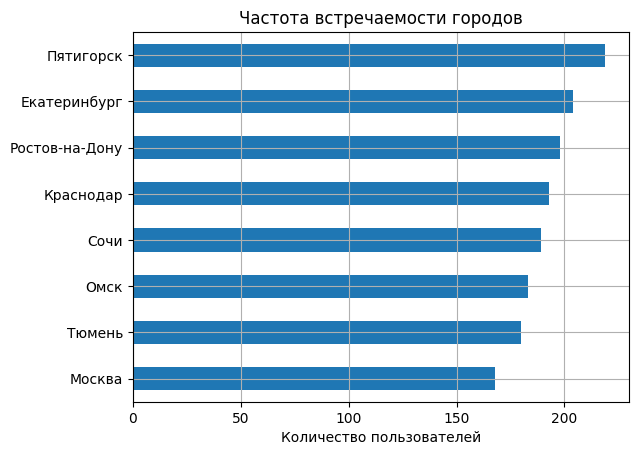

In [23]:
data_users['city'].value_counts(ascending=True).plot.barh(grid=True)

plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.show()

Выведем на экран их количества:

In [22]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

* Больше всего пользователей из Пятигорска - *219*.   
Меньше всего из Москвы - *168*.

Как города распределены по датафрейму в процентах:

In [24]:
# Улучшенный вариант
data_users['city'].value_counts(normalize=True).round(2)

Пятигорск         0.14
Екатеринбург      0.13
Ростов-на-Дону    0.13
Краснодар         0.13
Сочи              0.12
Омск              0.12
Тюмень            0.12
Москва            0.11
Name: city, dtype: float64

**Вывод:**  

Доля присутствия всех 8 городов в выборке примерно одинаковая (от 11% до 14%). 

Самый часто встречаемый город:
* Пятигорск - 219   

Самый редко встречаемый город:
* Москва - 168

##### Соотношение пользователей с подпиской и без подписки

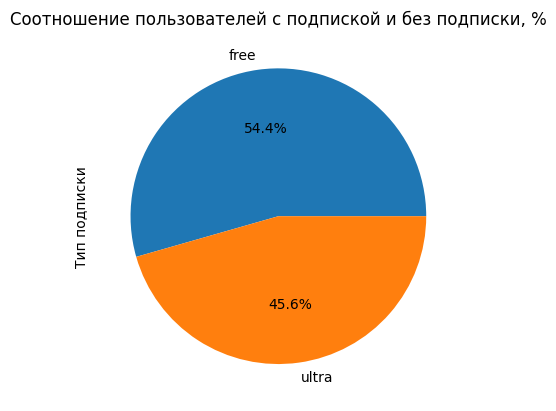

In [26]:
# Построим круговую диаграмму с отображением отношения групп пользователей в процентах
data_users['subscription_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки, %')
plt.ylabel('Тип подписки')
plt.show()

По гистограмме и круговой диаграмме видно, что у большей части пользователей нет подписки. 

Распределение в процентном соотношении: 
* 54.5% к 45.6% в пользу пользователей без подписки.

Количество пользователей без подписки (free) и с подпиской (ultra):

In [27]:
print (data_users['subscription_type'].value_counts(), '\n')

# Определим разницу между количествами free и ultra:
print ('free-ultra = ', len(data_users.query('subscription_type == "free"'))-len(data_users.query('subscription_type == "ultra"')))

free     835
ultra    699
Name: subscription_type, dtype: int64 

free-ultra =  136


**Вывод:**

У 54% пользователей в выборке нет подписки.  
У оставшихся 46% - подписка ultra.

Пользователей с подпиской:
* 699

Пользователей без подписки:
* 835

##### Возраст пользователей

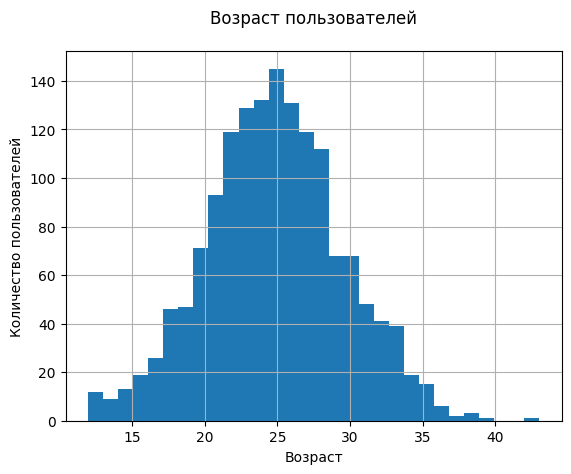

In [28]:
# Строим гистограмму
data_users['age'].hist(bins=30)

# Добавляем заголовок, подписываем оси
plt.title('Возраст пользователей', pad=20)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

- По гистограмме можно сказать, что большая часть пользователей - от 20 до 30 лет.

Определим основные характеристики:

In [29]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [30]:
print ('Самый часто встречаемый возраст: ', data_users['age'].mode()[0])
print ('Размах: ', data_users['age'].max() - data_users['age'].min())
print ('Межквартильный размах: ', stats.iqr(data_users['age']))

Самый часто встречаемый возраст:  25
Размах:  31
Межквартильный размах:  6.0


___
**Вывод:**

О пользователях:
* средний возраст - 25 *(со стандартным отклонением 4,57)*
* медианный возраст - 25
* минимальный возраст - 12
* максимальный возраст - 43
* наиболее часто встречаемый возраст (мода) - 25

В половине случаев возраст пользователей составляет от 22 до 28 лет.  


*<font color="maroon">P.S. Есть пользователи младше 18 лет - пока оставим их в выборке. Актуальность этих данных стоило бы уточнить у коллег из GoFast. Вероятно, что правила могут ограничивать аренду самоката лицами младше 18/16/14 лет. А могут и не ограничивать. </font>

___

##### Расстояние, которое пользователь преодолел за одну поездку

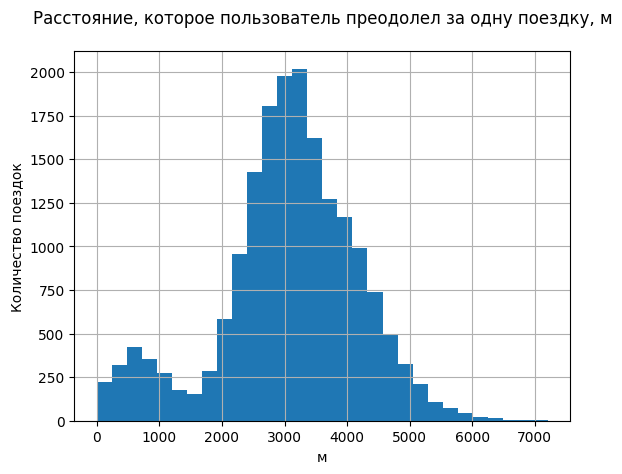

In [29]:
data_rides['distance'].hist(bins=30)
plt.title('Расстояние, которое пользователь преодолел за одну поездку, м', pad=20)
plt.ylabel('Количество поездок')
plt.xlabel('м')
plt.show()

- в основном люди при использовании самоката проезжают от 2 до 5 километров.

Изучим внимательнее отрезок 0-1000 м, который явно выделяется.

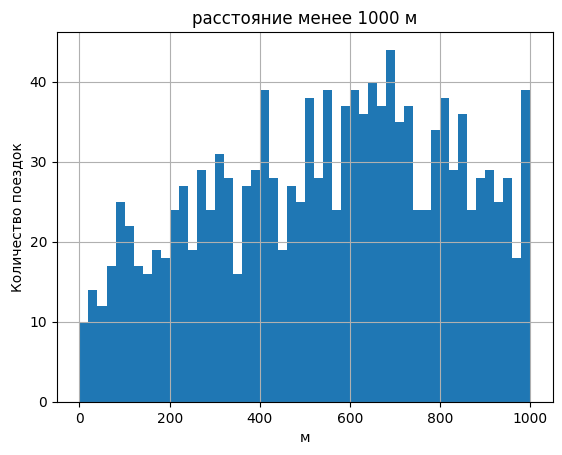

In [30]:
data_rides['distance'].hist(bins=50, range=(0,1000))
plt.title('расстояние менее 1000 м')
plt.ylabel('Количество поездок')
plt.xlabel('м')
plt.show()

* Вероятно, это просто короткие поездки.

Для поездок длительностью менее 50 м проверим информацию о времени поездки:

In [31]:
data_rides.query('distance < 50')['duration'].describe()

count    31.000000
mean      7.255102
std       3.908069
min       2.035632
25%       4.021955
50%       7.061072
75%      10.035808
max      14.143966
Name: duration, dtype: float64

* Вероятно, как минимум в половине случаев это просто очень короткие поездки (менее 7 минут).  
Для остальных случаев могли возникнуть, например, проблемы с приложением или самокатом, либо пользователи проехали такое количество пути по каким-то своим причинам.


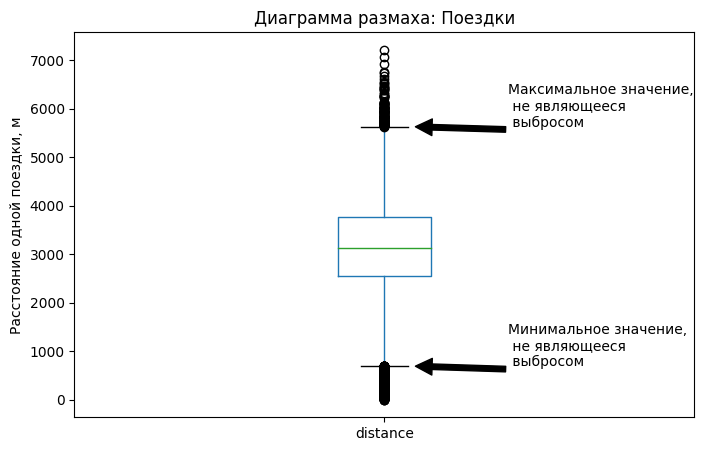

max:  5625.717298360568
min:  693.7317969370258


In [32]:
# Диаграмма размаха
data_rides['distance'].plot.box(figsize=(8, 5))

# Добавляем название диаграммы и подписываем оси 
plt.title('Диаграмма размаха: Поездки')
plt.ylabel('Расстояние одной поездки, м')

# Указываем min и max значения
plt.annotate('Максимальное значение, \n не являющееся \n выбросом', xy=(1.05, 5625),  xycoords='data',
            xytext=(1.2, 5630), textcoords='data',
            arrowprops=dict(facecolor='black'))
plt.annotate('Минимальное значение, \n не являющееся \n выбросом', xy=(1.05, 693),  xycoords='data',
            xytext=(1.2, 693), textcoords='data',
            arrowprops=dict(facecolor='black'))

# Выводим график
plt.show()

# Определим минимальное и максимальное значения, не являющиеся выбросами
print ('max: ', data_rides['distance'].quantile(0.75) + stats.iqr(data_rides['distance']) * 1.5)
print ('min: ', data_rides['distance'].quantile(0.25) - stats.iqr(data_rides['distance']) * 1.5)

* по диаграмме размаха выбросами не являются значения примерно от 690 до 5626 метров

Тем не менее, пока не будем удалять эти значения.  
Вероятно, они могут потребоваться в будущем для анализа очень малых или очень больших преодоленных расстояний.

Определим основные характеристики параметра `distance`, не включая выбросы:

In [33]:
data_rides.query('distance > 690 and distance < 5630')['distance'].describe()

count    17037.000000
mean      3191.384705
std        929.713269
min        691.301162
25%       2643.393235
50%       3173.866773
75%       3806.173406
max       5626.252803
Name: distance, dtype: float64

In [34]:
print ('Размах: ', data_rides['distance'].max() - data_rides['distance'].min())
print ('Межквартильный размах: ', stats.iqr(data_rides['distance']))

Размах:  7210.152061672838
Межквартильный размах:  1232.9963753558854


In [35]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод:**

1. 
Расстояния, преодолеваемые пользователями за одну поездку, не считая выбросов:
* Среднее - 3191 м
* Стандартное отклонение - 929.7 м
* Минимальное - 691 м  
* Максимальное - 5626 м
* Размах - 4935 м

В половине случаев пользователи проезжают от 2543 м до 3806 метров.  
По диаграмме размаха выбросами не являются значения примерно от 690 до 5626 метров.

2. 
С выбросами:
* Среднее - 3070 м
* Стандартное отклонение - 1116.8 м
* Минимальное - 0.86 м  
* Максимальное - 7211 м
* Размах - 7210 м

##### Продолжительность поездок

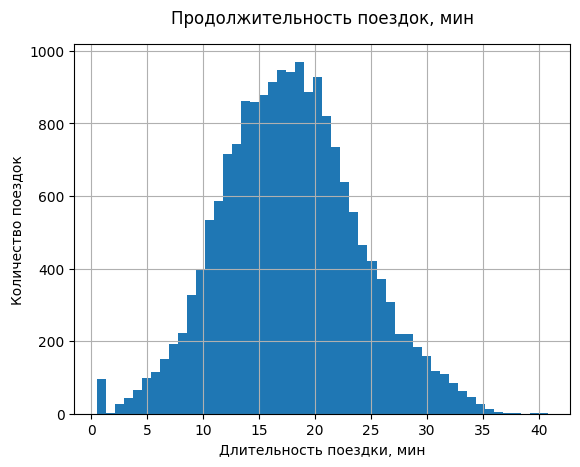

In [36]:
data_rides['duration'].hist(bins=50)
plt.title('Продолжительность поездок, мин', pad=15)
plt.ylabel('Количество поездок')
plt.xlabel('Длительность поездки, мин')
plt.show()

* Нормальное распределение. В основном поездки длительностью от 10 до 25 минут.

Видно выброс в левой части графика, в области от 0 до 2.  
Изучим внимательнее.

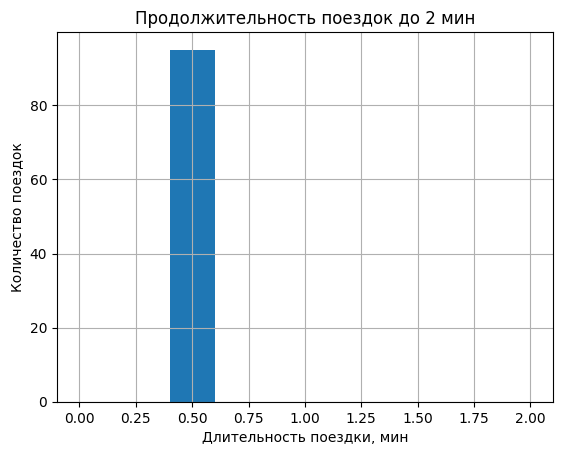

In [37]:
data_rides['duration'].hist(range=(0, 2))
plt.title('Продолжительность поездок до 2 мин')
plt.ylabel('Количество поездок')
plt.xlabel('Длительность поездки, мин')
plt.show()

- Всего полминуты. Посмотрим данные в этом срезе:

In [38]:
print ('Количество строк с duration = 0.5 минут: ', len(data_rides.query('duration == 0.5')))
data_rides.query('duration == 0.5').head()

Количество строк с duration = 0.5 минут:  95


,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


Посмотрим, какие дистанции они при этом проезжали:

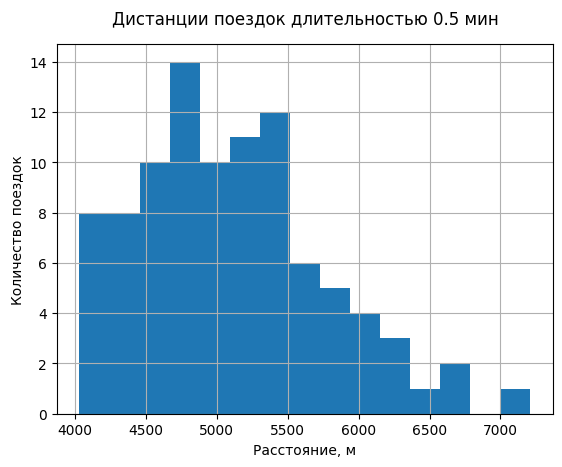

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

In [39]:
data_rides.query('duration == 0.5')['distance'].hist(bins=15)
plt.title('Дистанции поездок длительностью 0.5 мин', pad=15)
plt.ylabel('Количество поездок')
plt.xlabel('Расстояние, м')
plt.show()

data_rides.query('duration == 0.5')['distance'].describe()

* За время 0.5 минут пользователи проезжали от 4 до 7 км.   
Видимо, произошла какая-то техническая ошибка при подсчете времени во время поездки.

Определим основные характеристики параметра `duration` по data_rides_good:

In [40]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [41]:
print ('Размах: ', data_rides['duration'].max() - data_rides['duration'].min())
print ('Межквартильный размах: ', stats.iqr(data_rides['duration']))

Размах:  40.32396261922424
Межквартильный размах:  8.127237170546415


Диаграмма размаха:

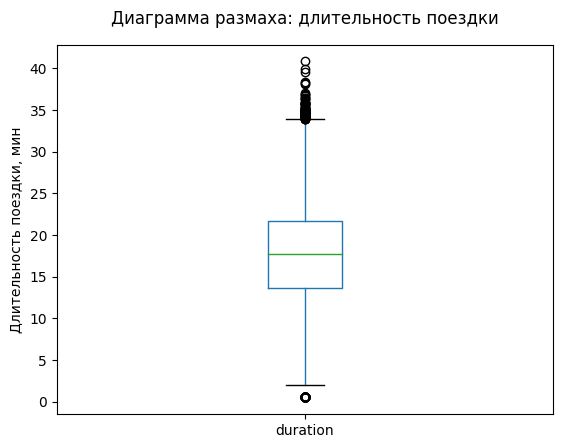

In [42]:
data_rides['duration'].plot.box()

# Добавляем названия и подписываем оси
plt.title('Диаграмма размаха: длительность поездки', pad=15)
plt.ylabel('Длительность поездки, мин')

plt.show()

* Выбросами могут считаться значения примерно до 2 и от 35 минут.

_____
**Вывод:**

После удаления выброса в 0.5 мин характеристики параметра "длиность поездки" следующие:
* Средняя - 17,9 минут
* Стандартное отклонение 5,97 минут
* Максимальная - 40,8 минут
* Минимальная - 2 минуты
* Размах - 39 минут

В половине случаев длительность поездки составляет от 13,7 до 21,7 минут.  
Нормальными можем считать значения от 2 до 35 минут.
________

##### **Вывод по 3 разделу**

**Пользователи:**

В выборке присутствует 8 городов с примерно одинаковой долей в выборке (от 11% до 14%).  
* Самый часто встречаемый город: Пятигорск; 
* Самый редко встречаемый город - Москва.

54% пользователей - без подписки.  
46% пользователей - подписка ultra.

Средний возраст - 25.    
От 12 до 43 лет.  
В половине случаев возраст пользователей составляет от 22 до 28 лет.

**Поездки:**

Среднее расстояние - 3070 м.  
В половине случаев - от 2543 м до 3776 метров.    
Нормальными можем считать значения от 900 до 6000 метров.  

Средняя длительность - 17,9 минут   
В половине случаев длительность поездки составляет от 13,7 до 21,7 минут.  
Нормальными можем считать значения от 2 до 35 минут. 

#### **Шаг 4.** Объединение данных

#####  Объединим данные о пользователях, поездках и подписках в один датафрейм. 

1. Данные о поездках с данными о пользователях:

In [44]:
data_common = data_rides.merge(data_users, on='user_id', how='outer')
data_common.head(2)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra


2. Данные о поездках и пользователях с данными о подписках:

In [45]:
data_common = data_common.merge(data_subscriptions, on='subscription_type', how='outer')
data_common.head(2)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199


Проверим количество строк датафрейма до и после объединения, чтобы убедиться, что никакие данные не были утеряны и не были добавлены лишние:

In [46]:
print ('Количество строк до объединения: \n', len(data_rides))
print ('Количество строк после объединения: \n', len(data_common))

Количество строк до объединения: 
 18068
Количество строк после объединения: 
 18068


* Количество строк равное

#####  Создадим разные датафреймы с данными для пользователей с подпиской и без подписки.

1. Без подписки:

In [47]:
data_common_free = data_common.query('subscription_type == "free"')
display(data_common_free.head())
print ('Размер датафейма: ', data_common_free.shape)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Размер датафейма:  (11568, 12)


2. С подпиской:

In [49]:
data_common_ultra = data_common.query('subscription_type == "ultra"')
display(data_common_ultra.head(2))
print ('Размер датафейма: ', data_common_ultra.shape)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199


Размер датафейма:  (6500, 12)


#####  Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

######  Без подписки

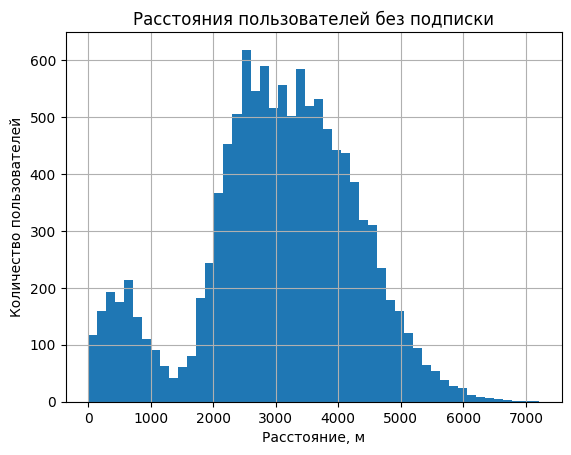

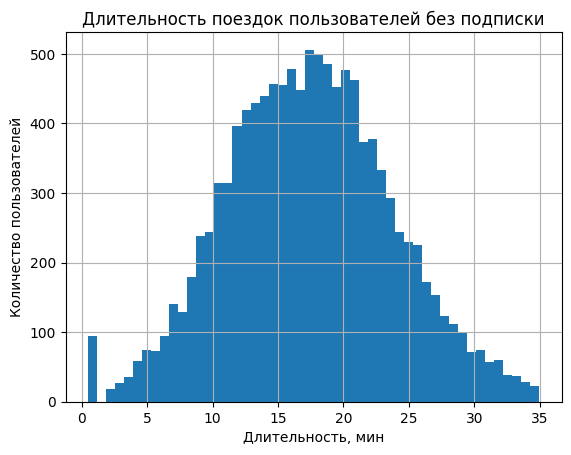

In [50]:
data_common_free['distance'].hist(bins=50)
plt.title('Расстояния пользователей без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

data_common_free['duration'].hist(bins=50)
plt.title('Длительность поездок пользователей без подписки')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество пользователей')
plt.show()

In [51]:
print ('distance:') 
print (data_common_free['distance'].describe(), '\n')

print ('duration:')
print (data_common_free['duration'].describe())

distance:
count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64 

duration:
count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


######  С подпиской ultra

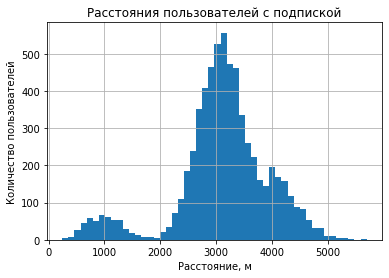

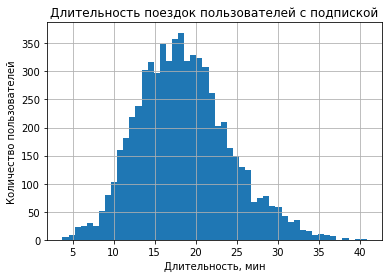

In [52]:
data_common_ultra['distance'].hist(bins=50)
plt.title('Расстояния пользователей с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

data_common_ultra['duration'].hist(bins=50)
plt.title('Длительность поездок пользователей с подпиской')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество пользователей')
plt.show()

Объединим графики по одному параметру для разных групп пользователей:

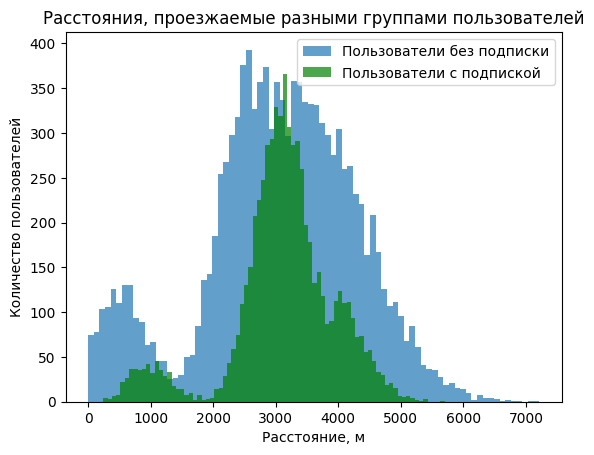

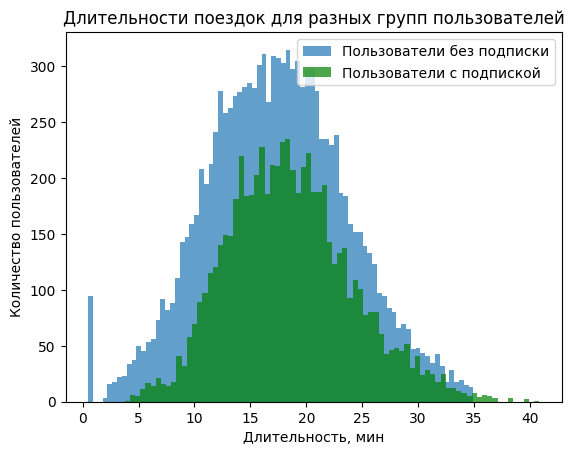

In [51]:
# Для 'distance'
plt.hist(data_common_free['distance'], bins=80, alpha=0.7, label='Пользователи без подписки')
plt.hist(data_common_ultra['distance'], bins=80, color='green', alpha=0.7, label='Пользователи с подпиской')
plt.title('Расстояния, проезжаемые разными группами пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Расстояние, м')
plt.legend()
plt.show()

# Для 'duration'
plt.hist(data_common_free['duration'], bins=80, alpha=0.7, label='Пользователи без подписки')
plt.hist(data_common_ultra['duration'], bins=80, color='green', alpha=0.7, label='Пользователи с подпиской')
plt.title('Длительности поездок для разных групп пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Длительность, мин')
plt.legend()
plt.show()

In [52]:
print ('distance:') 
print (data_common_ultra['distance'].describe(), '\n')

print ('duration:')
print (data_common_ultra['duration'].describe())

distance:
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64 

duration:
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


**Вывод по гистограммам**

Расстояния:
1. Расстояние поездок менее 1 км намного чаще встречается у пользователей без подписки.
2. Разброс и максимальное расстояние поздки больше у пользователей без подписки.
3. Межквартильный размах расстояний больше у пользователей без подписки.

Длительности:
1. Раброс и максимальная продолжительность поездки больше у пользователей с подпиской. 
2. Выбросы в duration в районе 0.5 минут, обнаруженные ранее в *3.5 Продолжительность поездок*, наблюдаем только для пользователей без подписки. 
3. Межквартильный размах длительностей больше у пользователей без подписки.
___________

##### **Вывод по 4 разделу**

Создан единый датафрейм с информацией о поездках, пользователях и подписках.  
Созданы дополнительные 2 датафрейма для пользователей с подпиской и без нее. 

По данным о поездках пользователей двух групп можно сделать следующие выводы:
* Пользователи без подписки:   
 1. Чаще, чем пользователи с подпиской, проезжают менее 1 км
 2. Шире межквартильный размах для расстояния и длительности поездки (размах 50% значений)
 3. Есть подозрительный выброс в длительности поездки в районе 0.5 минут


* Пользователи с подпиской:  
 1. Больше разброс и максимальная продолжительность поездки
 2. Уже межквартильный размах для расстояния и длительности поездки (размах 50% значений)
________________

#### **Шаг 5.** Подсчёт выручки

##### Создим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.

Для пользователя за каждый месяц найдем:   
* суммарное расстояние, количество поездок и суммарное время.

In [53]:
data_aggregated = data_common.pivot_table(index = ['user_id', 'month'], values = ['distance', 'duration'], 
                                          aggfunc = {'duration': sum, 'distance': [sum, 'count']})
data_aggregated.head(10)

distance                 duration
                 count           sum        sum
user_id month                                  
1       1            2   7027.511294  41.416640
        4            1    754.159807   6.232113
        8            2   6723.470560  44.776802
        10           2   5809.911100  31.578017
        11           3   7003.499363  53.397424
        12           2   6751.629942  27.203912
2       3            3  10187.723006  60.959959
        4            2   6164.381824  39.048633
        6            1   3255.338202  13.851127
        7            2   6780.722964  46.170157

Переименуем столбцы:

In [54]:
data_aggregated.columns = ['rides_numbers', 'distance_sum', 'duration_sum']
data_aggregated

rides_numbers  distance_sum  duration_sum
user_id month                                           
1       1                  2   7027.511294     41.416640
        4                  1    754.159807      6.232113
        8                  2   6723.470560     44.776802
        10                 2   5809.911100     31.578017
        11                 3   7003.499363     53.397424
...                      ...           ...           ...
1534    6                  2   3409.468534     24.812678
        8                  2   7622.453034     47.205960
        9                  1   4928.173852     22.560373
        11                 4  13350.015305     76.342174
        12                 1   2371.711192     15.893917

[11331 rows x 3 columns]

##### Добавим столбец с помесячной выручкой

Сначала добавим в исходные данные столбец `ride_revenue` - он будет отображать стоимость каждой поездки.  
Для этого округлим значения столбца "длительность" в большую сторону, умножим на цену минуты и прибавим стоимость старта поездки:

In [56]:
data_common['ride_revenue'] = np.ceil(data_common['duration']) * data_common['minute_price'] + data_common['start_ride_price']
data_common.head(2)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,ride_revenue
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199,156.0
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199,96.0


**Далее на основе посчитанного в data_common `ride_revenue` 2 варианта решения:**

###### Вариант 1

Создадим вспомогательную таблицу `helper` для подсчета суммы стоимостей всех поездок без учета стоимости подписки `ride_revenue_sum` и суммы стоимостей подписок для каждого пользователя по месяцам `subscription_fee_sum`:

In [57]:
helper = data_common.groupby(['user_id', 'month'])[['ride_revenue', 'subscription_fee']].sum()
helper.columns = ['ride_revenue_sum', 'subscription_fee_sum']
helper

ride_revenue_sum  subscription_fee_sum
user_id month                                        
1       1                 252.0                   398
        4                  42.0                   199
        8                 276.0                   398
        10                192.0                   398
        11                336.0                   597
...                         ...                   ...
1534    6                 308.0                     0
        8                 484.0                     0
        9                 234.0                     0
        11                824.0                     0
        12                178.0                     0

[11331 rows x 2 columns]

В data_aggregated создадим столбец `revenue`, в котором для каждого пользователя по месяцам **прибавим к** сумме посчитанного в helper **`ride_revenue_sum`** (сумма стоимостей поздок без учета подписки) **сумму подписок `subscription_fee_sum`**, деленных на количество поездок в течение месяца (т.к. подписка оплачивается раз в месяц):

In [58]:
data_aggregated['revenue'] = helper['ride_revenue_sum'] + helper['subscription_fee_sum'] / data_aggregated['rides_numbers']
data_aggregated

rides_numbers  distance_sum  duration_sum  revenue
user_id month                                                    
1       1                  2   7027.511294     41.416640    451.0
        4                  1    754.159807      6.232113    241.0
        8                  2   6723.470560     44.776802    475.0
        10                 2   5809.911100     31.578017    391.0
        11                 3   7003.499363     53.397424    535.0
...                      ...           ...           ...      ...
1534    6                  2   3409.468534     24.812678    308.0
        8                  2   7622.453034     47.205960    484.0
        9                  1   4928.173852     22.560373    234.0
        11                 4  13350.015305     76.342174    824.0
        12                 1   2371.711192     15.893917    178.0

[11331 rows x 4 columns]

Дополнительно добавим столбец со стоимостью ежемесячной подписки для каждого пользователя, чтобы различать пользователей по наличию подписки при проверке гипотезы в шаге 6.3.

In [59]:
data_aggregated['subscription_fee'] = helper['subscription_fee_sum'] / data_aggregated['rides_numbers']
data_aggregated.head()

rides_numbers  distance_sum  duration_sum  revenue  \
user_id month                                                       
1       1                  2   7027.511294     41.416640    451.0   
        4                  1    754.159807      6.232113    241.0   
        8                  2   6723.470560     44.776802    475.0   
        10                 2   5809.911100     31.578017    391.0   
        11                 3   7003.499363     53.397424    535.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0

###### Вариант 2

*Для демонстрации второго варианта решения сначала дублирую `data_aggregated` из п.5.1 как `data_aggregated_1` (т.к. после выполнения предыдущей ячейки в `data_aggregated` уже находится 5 посчитанных столбцов):*

In [60]:
data_aggregated_1 = data_common.pivot_table(index = ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = {'duration': sum, 'distance': [sum, 'count']})
data_aggregated_1.columns = ['rides_numbers', 'distance_sum', 'duration_sum']
data_aggregated_1.head()

rides_numbers  distance_sum  duration_sum
user_id month                                           
1       1                  2   7027.511294     41.416640
        4                  1    754.159807      6.232113
        8                  2   6723.470560     44.776802
        10                 2   5809.911100     31.578017
        11                 3   7003.499363     53.397424

Добавляем новые столбцы с типом, стоимостью подписки и выручкой от поездкок без учета стоимости подписки через *pivot_table*:

In [61]:
data_aggregated_1[['ride_revenue', 'subscription_fee', 'subscription_type']] = data_common.pivot_table(index = ['user_id', 'month'], values = ['subscription_type', 'subscription_fee', 'ride_revenue'], aggfunc = {'subscription_type': 'first', 'subscription_fee': 'first', 'ride_revenue': sum})
data_aggregated_1

rides_numbers  distance_sum  duration_sum  ride_revenue  \
user_id month                                                            
1       1                  2   7027.511294     41.416640         252.0   
        4                  1    754.159807      6.232113          42.0   
        8                  2   6723.470560     44.776802         276.0   
        10                 2   5809.911100     31.578017         192.0   
        11                 3   7003.499363     53.397424         336.0   
...                      ...           ...           ...           ...   
1534    6                  2   3409.468534     24.812678         308.0   
        8                  2   7622.453034     47.205960         484.0   
        9                  1   4928.173852     22.560373         234.0   
        11                 4  13350.015305     76.342174         824.0   
        12                 1   2371.711192     15.893917         178.0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra  
...                         ...               ...  
1534    6                     0              free  
        8                     0              free  
        9                     0              free  
        11                    0              free  
        12                    0              free  

[11331 rows x 6 columns]

Складываем полученные значения `ride_revenue` и `subscription_fee` :

In [62]:
data_aggregated_1['month_revenue'] = data_aggregated_1['ride_revenue'] + data_aggregated_1['subscription_fee']
data_aggregated_1

rides_numbers  distance_sum  duration_sum  ride_revenue  \
user_id month                                                            
1       1                  2   7027.511294     41.416640         252.0   
        4                  1    754.159807      6.232113          42.0   
        8                  2   6723.470560     44.776802         276.0   
        10                 2   5809.911100     31.578017         192.0   
        11                 3   7003.499363     53.397424         336.0   
...                      ...           ...           ...           ...   
1534    6                  2   3409.468534     24.812678         308.0   
        8                  2   7622.453034     47.205960         484.0   
        9                  1   4928.173852     22.560373         234.0   
        11                 4  13350.015305     76.342174         824.0   
        12                 1   2371.711192     15.893917         178.0   

               subscription_fee subscription_type  month_revenue  
user_id month                                                     
1       1                   199             ultra          451.0  
        4                   199             ultra          241.0  
        8                   199             ultra          475.0  
        10                  199             ultra          391.0  
        11                  199             ultra          535.0  
...                         ...               ...            ...  
1534    6                     0              free          308.0  
        8                     0              free          484.0  
        9                     0              free          234.0  
        11                    0              free          824.0  
        12                    0              free          178.0  

[11331 rows x 7 columns]

__________
##### **Вывод по 5 разделу**

Составлен дополнительный датафрейм с агрегированными данными о поездках для каждого пользователя за каждый месяц:
* Количество поездок
* Суммарное расстояние
* Суммарное время
* Месячная выручка   -   учтены стоимость подписки, стоимость начала поездки, длительность каждой поездки округлена в сторону ближайшего большего целого числа.
______________

#### **Шаг 6.** Проверка гипотез

________________
##### Тратят ли пользователи с подпиской больше времени на поездки?

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:**
* *Пользователи с подпиской и без подписки тратят одинаковое время на поездки.*

**Альтернативная правосторонняя гипотеза:**
* *Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.*

 

**Проверяем гипотезу методом ttest_ind()**

1. Создадим две Series с информацией по длительности поездок с подпиской и без подписки:  

In [66]:
ultra_duration = data_common_ultra['duration']
free_duration = data_common_free['duration']

# Проверим, что в датафреймах, из которых взяли значения, присутствует только нужная информация:
print ('Уникальные значения типа подписки в датафрейме Ultra: ', data_common_ultra['subscription_type'].unique())
print ('Уникальные значения типа подписки в датафрейме Free: ', data_common_free['subscription_type'].unique())

Уникальные значения типа подписки в датафрейме Ultra:  ['ultra']
Уникальные значения типа подписки в датафрейме Free:  ['free']


2. Зададим уровень значимости 0.05:

In [67]:
alpha = 0.05

3. Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»:

In [68]:
# Дисперсии могут отличаться, поэтому укажем параметр equal_var=False
results = stats.ttest_ind(ultra_duration, free_duration, equal_var=False, alternative='greater')

print('p-value:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.675781377128977e-37
Отвергаем нулевую гипотезу


**Итог:**

Отвергаем нулевую гипотезу в пользу альтернативной - значение сильно ниже уровня значимости.  
* Есть основания полагать, что в среднем пользователи с подпиской больше времени на поездки.

____________
____________

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем гипотезы.  
Под "средним расстоянием" будем понимать среднее расстояние, которое проезжают пользователи с подпиской за одну поездку.

**Нулевая гипотеза:**
* *Среднее расстояние равно 3130 метров*

**Альтернативная гипотеза, правосторонняя:**
* *Среднее расстояния больше 3130 метров*

**Проверяем гипотезу методом ttest_1samp()**

1. Определим предполагаемое значение в переменной `interested_value`:

In [69]:
interested_value = 3130

2. В качестве выборки берем столбец `distance` датафрейма со значениями только для пользователей с подпиской `data_common_ultra`:

In [70]:
ultra_distance = data_common_ultra['distance']

3. Проверяем гипотезу методом ttest_1samp(), предварительно задав уровень значимости альфа:

In [71]:
# Задаем уровень значимости
alpha = 0.05

# Проводим тест
result_2 = stats.ttest_1samp(ultra_distance, interested_value, alternative='greater')

print('p-value:', result_2.pvalue)

if result_2.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу.')
else:
    print ('Нет оснований отвергать нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергать нулевую гипотезу


**Итог:**

Не удалось отвергнуть гипотезу, что среднее значение,  которое проезжают пользователи с подпиской за одну поездку, меньше или равно 3130 метрам.
_______
_________

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Сформулируем гипотезы.

**Нулевая гипотеза:**
* *Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки*

**Альтернативная гипотеза, правосторонняя:**
* *Помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки*

**Проверяем гипотезу методом ttest_ind()**

1. Создадим два Series для двух групп пользователей по столбцам `revenue`, взяв данные из таблицы data_aggregated, разделив пользователей по стоимости подписки:

In [72]:
# Выручки от пользователей без подписки
free_revenue = data_aggregated.query('subscription_fee == 0')['revenue']

# Выручки от пользователей с подпиской
ultra_revenue = data_aggregated.query('subscription_fee != 0')['revenue']

2. Проводим ttest на равенство двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»:

In [73]:
# Задаем уровень значимости:
alpha = 0.05

# Проводим тест:
# Дисперсии могут отличаться, поэтому укажем параметр equal_var=False

result_3 = stats.ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

print('p-value:', result_3.pvalue)

# проверяем p-value
if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Итог:**

Нулевую гипотезу отвергаем в сторону альтернативной, поскольку значение p-value очень мало.  

* Есть серьезные основания полагать, что помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки.

__________
___________

##### **Вывод по 6 разделу**

По результатам проверки гипотез можно сделать следующие выводы:

1. Есть основания полагать, что в среднем пользователи с подпиской больше времени на поездки.
2. Нельзя утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Есть серьезные основания полагать, что помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки.
______

#### Шаг 7. Распределения

##### Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%?

Задача:  
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. 

Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

**Решение**

Дано:

Биномиальное распределение  
Вероятность успеха p = 0.1  
Ожидаемое количество успехов k = 100  
Ожидаемая вероятность P < 0.055


1. С помощью метода binom.cdf() найдем минимальное количество промокодов n, при котором вероятность получения менее 100 новых платных подписчиков будет примерно равна 5%.  


Ищем нужное значение с помощью цикла.  
Т.к. по условию нужно найти вероятность "примерно 5%", будем искать по условию `< 0.055`, т.к. при 0.055 значение уже будет округляться в большую сторону - 0.6.

In [81]:
target_clients = 100  # Целевое количество клиентов для продления подписки
p_renewal = 0.1       # Вероятность продления подписки

# Подбор значения параметра n
n = 1
while binom.cdf(target_clients - 1, n, p_renewal) > 0.05:
    n += 1

# Вывод 
print(f"Минимальное количество промокодов: {n}")
print(f"Вероятность не выполнить план при таком количестве промокодов: {binom.cdf(target_clients - 1, n, p_renewal):.3%}")

Минимальное количество промокодов: 1161
Вероятность не выполнить план при таком количестве промокодов: 4.976%


**Подходящее значение - 1161**

Построим график биномиального распределения:

C:\anaconda3\envs\practicum\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


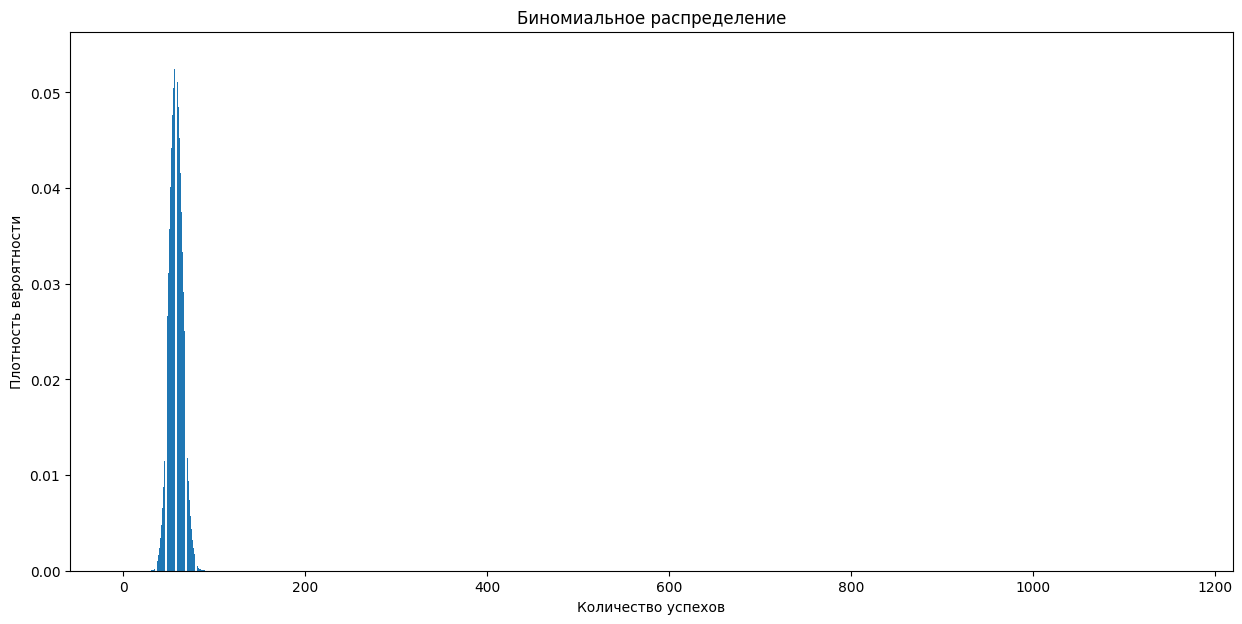

In [80]:
n = 1161  
p = 0.05 

x = range(n + 1)

y = binom.pmf(x, n, p)

plt.figure(figsize=(15, 7))
plt.bar(x, y)
plt.xlabel("Количество успехов")
plt.ylabel("Плотность вероятности")
plt.title("Биномиальное распределение")
plt.show()

**Вывод:**

Рекомендуется разослать 1167 промокодов, чтобы вероятность не выполнить план была примерно  5%.

__________
______________

##### Оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей

Задача: 

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений.

С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

**Дано:**

Биномиальное распределение.  
Количество испытаний n = 1000000  
Вероятность успеха p = 40%  


In [82]:
n = 1000000
p = 0.4

Проверим, можно ли аппроксимировать нормальным распределением:

In [83]:
print ('Правая граница: ', n*p + 3 * (n*p*(1-p))**0.5)
print ('Левая граница: ', n*p - 3 * (n*p*(1-p))**0.5)

Правая граница:  401469.6938456699
Левая граница:  398530.3061543301


* Мат ожидание +- 3 стандартных отклонения лежат в пределах [0, n].

Можно аппроксимировать.

Назначим переменные для мат.ожидания и стандартного распределения:

In [84]:
mu = n*p
sigma = (n*p*(1-p))**0.5

Задаем нормальное распределение:

In [85]:
distr = stats.norm(mu, sigma) 

Вероятность того, что уведомление откроют не более 399,5 тыс:

In [86]:
value = 399500
result = distr.cdf(value)
print (result)

0.15371708296369768


_____________________
____________________
___________________

##### **Вывод финальный**

Исследованы данные о некоторых пользователях сервиса аренды самокатов GoFast, а также об их поездках.

Сводка по выборке:  
* Больше пользователей без подписки, чем с подпиской (54% против 46% соответственно)
* 8 городов с примерно одинаковой долей в выборке (от 11% до 14%).
* Средний возраст пользователей - 25 лет, в половине случаев от 22 до 28 лет.
* Среднее расстояние поездок - 3070 м,   
  *в половине случаев - от 2543 м до 3776 метров. 
* Средняя длительность - 17,9 минут  
  *в половине случаев  от 13,7 до 21,7 минут.

Анализ данным о поездках пользователей двух групп показал:

*В рамках имеющейся выборки:*
* Пользователи без подписки:
 * Чаще, чем пользователи с подпиской, проезжали менее 1 км
 * Шире межквартильный размах для расстояния и длительности поездки (размах 50% значений)
* Пользователи с подпиской:
 * Больше разброс и максимальная продолжительность поездки
 * Уже межквартильный размах для расстояния и длительности поездки (размах 50% значений)


**По результатам проверки гипотез можно сделать следующие выводы:**

1. Есть основания полагать, что в среднем пользователи с подпиской больше времени на поездки.
2. Вероятно, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Есть серьезные основания полагать, что помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки.

**Рекомендации:**

Есть основания полагать, что для компании пользователи с подпиской являются более выгодными, на основании результатов проверки гипотез.

Вероятно, увеличение количества пользователей с подпиской ultra приведеет к увеличению средней длительности поездки и увеличению выручки.
